In [154]:
from matplotlib import pyplot as ply
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import kaleido
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#https://www.kaggle.com/datasets/camnugent/california-housing-prices
#https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering#DATA-CLEANING
df=pd.read_csv("C:/Users/Sew-th/Desktop/Python Datasets/california housing.csv")
df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


<Axes: >

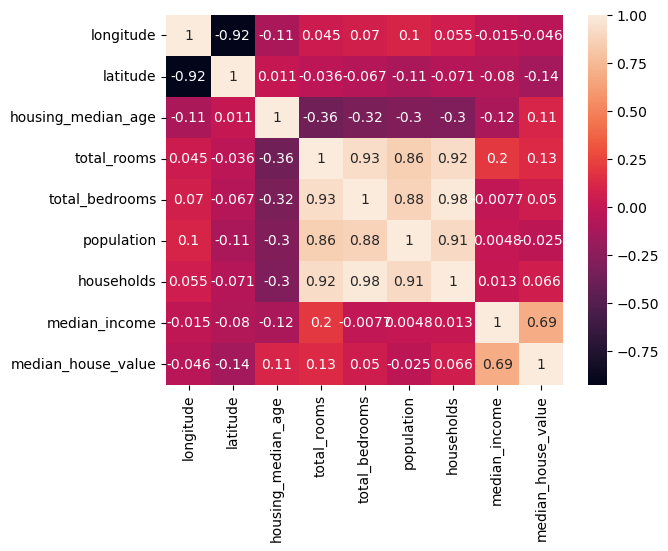

In [155]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
#pca um multikolinerität zu löschen

In [156]:
df2=df.loc[:,['longitude', 'latitude','median_income','median_house_value']]

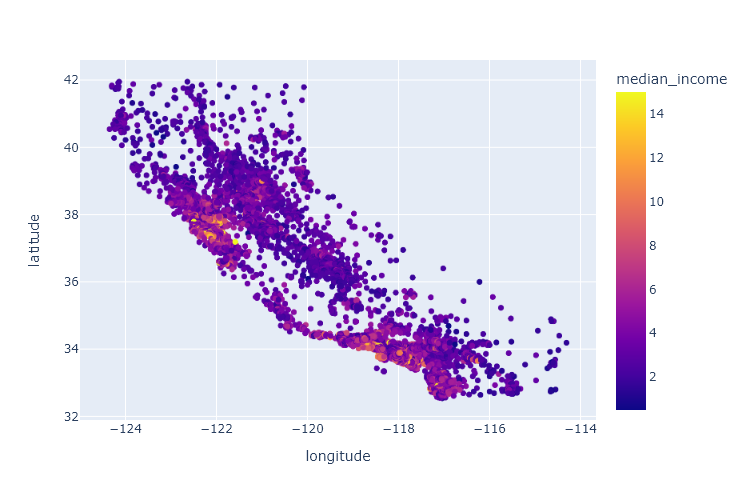

In [186]:
fig = px.scatter(df2, 'longitude','latitude', color='median_income', width=750,height=500)
fig.show('png')

In [158]:
df3=df.drop(['ocean_proximity','total_bedrooms'], axis=1)

In [159]:
#df3['Cluster']=KMeans(n_clusters=4, n_init=10).fit_predict(df3)
#df3['Cluster']=df3['Cluster'].astype('category')
df3

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672,84700.0


In [160]:
scaler=StandardScaler()
scaler.fit(df3)
df4=pd.DataFrame(scaler.transform(df3), columns=df3.columns)
df4


,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.974429,-0.977033,2.344766,2.129631
1,-1.322844,1.043185,-0.607019,2.045890,0.861439,1.669961,2.332238,1.314156
2,-1.332827,1.038503,1.856182,-0.535746,-0.820777,-0.843637,1.782699,1.258693
3,-1.337818,1.038503,1.856182,-0.624215,-0.766028,-0.733781,0.932968,1.165100
4,-1.337818,1.038503,1.856182,-0.462404,-0.759847,-0.629157,-0.012881,1.172900
...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.512592,-0.443449,-1.216128,-1.115804
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.944405,-1.008420,-0.691593,-1.124470
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.369537,-0.174042,-1.142593,-0.992746
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.604429,-0.393753,-1.054583,-1.058608


In [161]:
#only fit to check cumsum
pca=PCA(n_components=7)
pca= pca.fit(df4)
pca.explained_variance_ratio_.cumsum()

array([0.37530161, 0.61350859, 0.82497211, 0.93632901, 0.97213816,
       0.9877085 , 0.99466278])

In [162]:
#only works with fit, not fit_transform
pca_loading=pd.DataFrame(pca.components_, columns=df3.columns )
pca_loading


,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
0,0.124257,-0.126669,-0.269459,0.546841,0.532850,0.544123,0.105214,0.076176
1,-0.663420,0.688167,-0.035248,0.120667,0.099067,0.125228,-0.138352,-0.160811
2,-0.223124,0.100623,0.071316,0.051807,-0.111189,-0.058889,0.672110,0.681731
3,-0.044410,-0.080609,0.917085,0.082835,0.186713,0.199261,-0.213472,0.153255
4,0.103544,0.079539,0.271304,0.131250,0.109880,-0.144997,0.654584,-0.656157
5,-0.199837,-0.143181,-0.071154,-0.598014,0.736656,-0.163645,0.077156,0.038562
6,0.395036,0.406506,0.021261,0.328595,0.322550,-0.627386,-0.170547,0.208649


In [163]:
#used for dataframe below.
pca=PCA(n_components=3)
pca= pca.fit_transform(df4)

In [164]:
pca_data=pd.DataFrame(pca, columns=(['pc1','pc2','pc3']))
pca_data

,pc1,pc2,pc3
0,-1.644995,0.587749,3.624189
1,2.699005,1.624218,2.732126
2,-1.703238,0.832802,2.703707
3,-1.759822,0.977232,2.052761
4,-1.710038,1.140078,1.423898
...,...,...,...
20635,-1.215292,1.941127,-1.188021
20636,-1.799073,1.765442,-0.808918
20637,-0.661534,2.040996,-1.105699
20638,-1.028378,1.997146,-1.044944


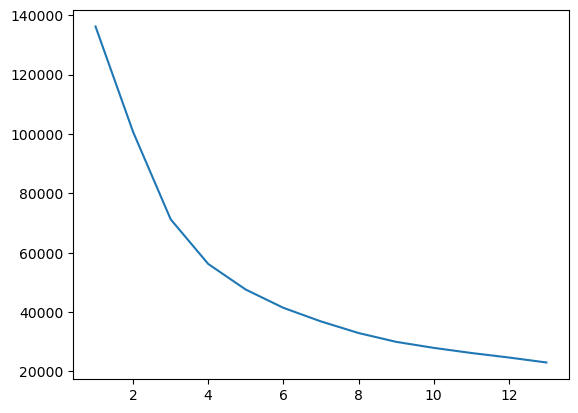

In [165]:
Sum_of_squared_distances = []
K = range(1,14)
for k in K:
    km = KMeans(n_clusters=k, n_init=10).fit(pca_data)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances)

In [166]:
pca_data['Cluster']=KMeans(n_clusters=3, n_init=10).fit_predict(pca_data)
pca_data['Cluster']=pca_data['Cluster'].astype('category')
#adding to original dataframe
df['Cluster']=pca_data['Cluster'].astype('category')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Cluster
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,2
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,1


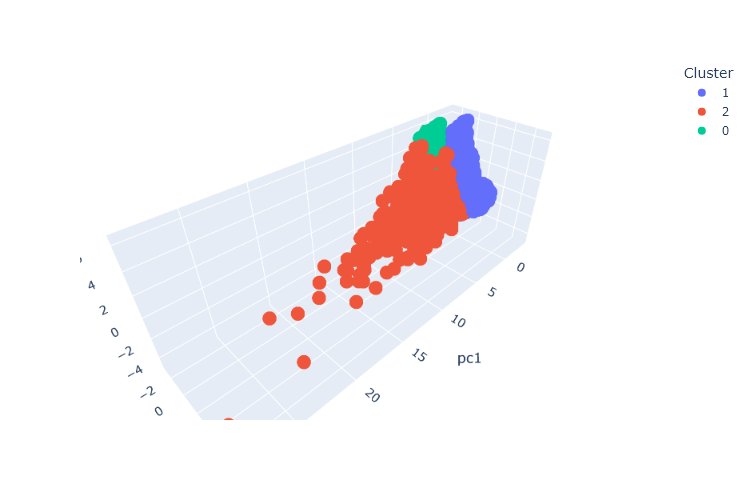

In [181]:
fig = px.scatter_3d(pca_data, 'pc1','pc2','pc3', color='Cluster', width=750,height=500)
fig.show('png')


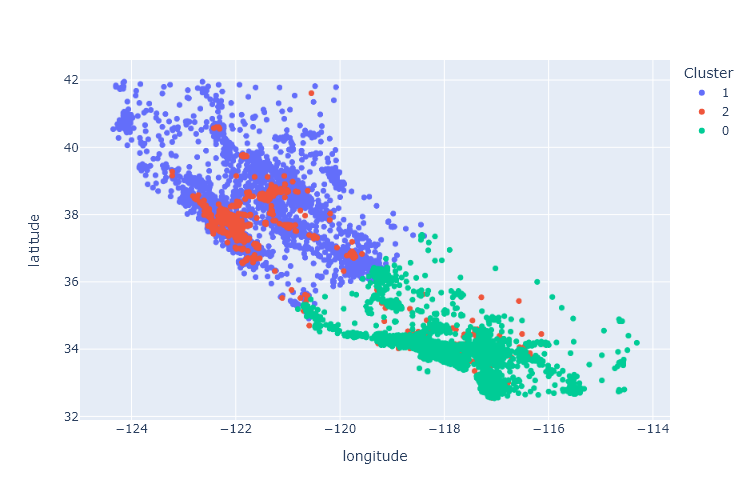

In [187]:
fig = px.scatter(df, 'longitude', 'latitude', color='Cluster', width=750,height=500 )
fig.show('png')

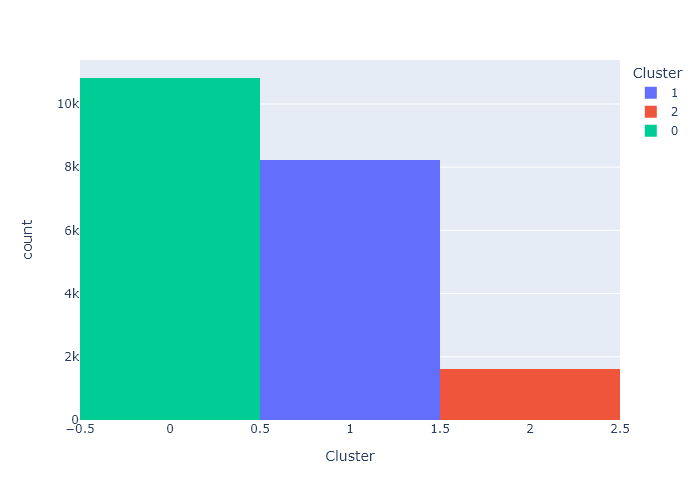

In [182]:
fig = px.histogram(df, 'Cluster', color='Cluster')
fig.show('png')

In [171]:
columns_toplot=df.columns.tolist()

#for i in columns_toplot:
    #sns.jointplot(x=df[i], y=df['median_house_value'], hue=df['Cluster'], kind='kde')

In [172]:
#testing if kmeans without pca is better
df6=df4.copy()
df6['Cluster']=KMeans(n_clusters=3, n_init=10).fit_predict(df6)
df6['Cluster']=df6['Cluster'].astype('category')
df6

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,Cluster
0,-1.327835,1.052548,0.982143,-0.804819,-0.974429,-0.977033,2.344766,2.129631,1
1,-1.322844,1.043185,-0.607019,2.045890,0.861439,1.669961,2.332238,1.314156,2
2,-1.332827,1.038503,1.856182,-0.535746,-0.820777,-0.843637,1.782699,1.258693,1
3,-1.337818,1.038503,1.856182,-0.624215,-0.766028,-0.733781,0.932968,1.165100,1
4,-1.337818,1.038503,1.856182,-0.462404,-0.759847,-0.629157,-0.012881,1.172900,1
...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.512592,-0.443449,-1.216128,-1.115804,1
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.944405,-1.008420,-0.691593,-1.124470,1
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.369537,-0.174042,-1.142593,-0.992746,1
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.604429,-0.393753,-1.054583,-1.058608,1


In [173]:
df6['PCA cluster']=df['Cluster'].astype('int32')
df6['diff cluster']=df6['Cluster'].astype('int32')-df6['PCA cluster']
df



,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,Cluster,PCA cluster,diff cluster
0,-1.327835,1.052548,0.982143,-0.804819,-0.974429,-0.977033,2.344766,2.129631,1,1,0
1,-1.322844,1.043185,-0.607019,2.045890,0.861439,1.669961,2.332238,1.314156,2,2,0
2,-1.332827,1.038503,1.856182,-0.535746,-0.820777,-0.843637,1.782699,1.258693,1,1,0
3,-1.337818,1.038503,1.856182,-0.624215,-0.766028,-0.733781,0.932968,1.165100,1,1,0
4,-1.337818,1.038503,1.856182,-0.462404,-0.759847,-0.629157,-0.012881,1.172900,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.512592,-0.443449,-1.216128,-1.115804,1,1,0
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.944405,-1.008420,-0.691593,-1.124470,1,1,0
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.369537,-0.174042,-1.142593,-0.992746,1,1,0
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.604429,-0.393753,-1.054583,-1.058608,1,1,0


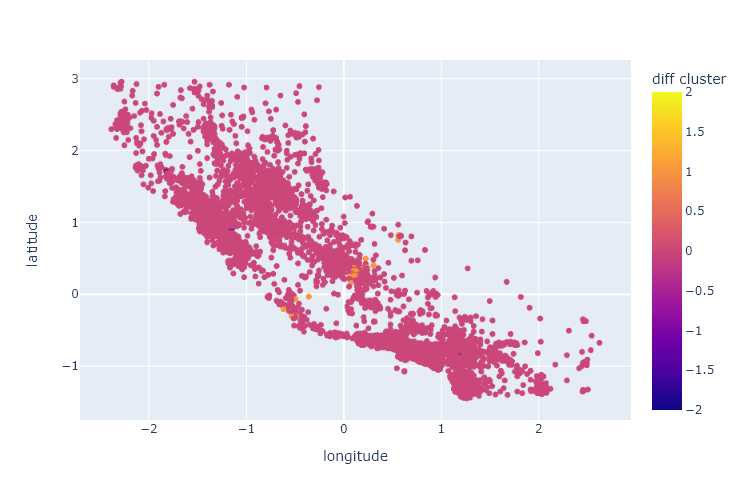

In [183]:
fig = px.scatter(df6, 'longitude', 'latitude', color='diff cluster', width=750,height=500 )
fig.show('png')
#same clusters with or without PCA

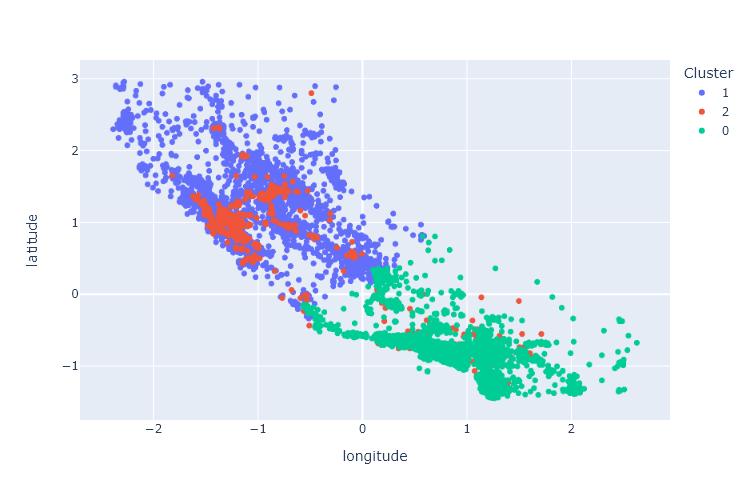

In [184]:
fig = px.scatter(df6, 'longitude', 'latitude', color='Cluster', width=750,height=500 )
fig.show('png')

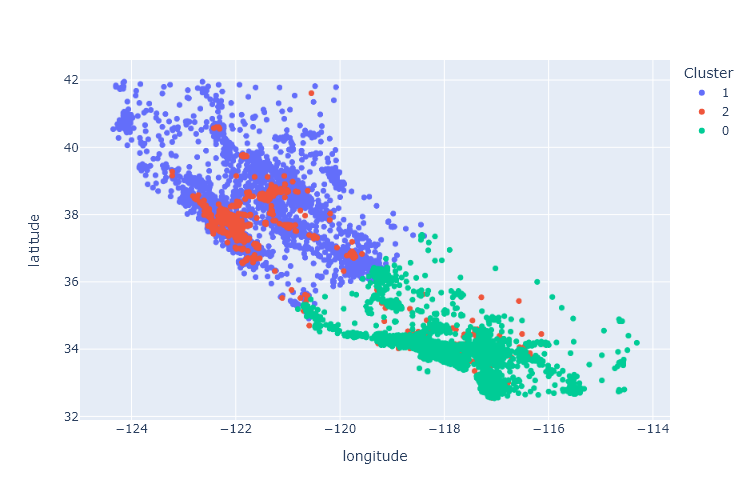

In [185]:
fig= px.scatter(df, 'longitude', 'latitude', color='Cluster', width=750,height=500 )
fig.show('png')